# IMDB Web Scraping

Web scraping is a process of generating data from a website which in our case is IMdb(an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, ratings, and fan and critical reviews).Internet can be a amazing source of data to do various kind of data analysis , web scraping is a skill which helps us to do exactly that. The process used in **this project is completely legal and is my own work, although I have used sites such as stackoverflow to make my code more optimized**

Objective
There are two objectives of this project, one being showcasing my web scraping skill and the other is to do some exploratory data analysis and try to find some inference on the data scraped.

## Libraries used are as follow:

In [1]:
import bs4
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

The url from which the data is scrapped : [IMDb "Top 1000"(Sorted by IMDb Rating Descending)]

Let K be the no of movies we want to analyze out of the top 1000 movies

In [2]:
K = 779
print(f'Taking K as {K}')

Taking K as 779


In [3]:
def Souper(K):
    soup1 = bs4.BeautifulSoup()
    j = np.floor(K/250) + 1
    if K<=250:
        url = requests.get(f'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count={K}&start=0&ref_=adv_nxt').text
        soup1.append(bs4.BeautifulSoup(url,'lxml'))   
    
    if K>250: 
        for i in range(int(j)):
            if(((j-i)*250)>=250):
                url = requests.get(f'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=250&start={(i)*250}&ref_=adv_nxt').text                  
            if(((j-i)*250)<=250):    
                url = requests.get(f'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count={K%250}&start={i*250}&ref_=adv_nxt').text   
            soup1.append(bs4.BeautifulSoup(url,'lxml'))
    return soup1

In [4]:
type(Souper(K))

bs4.BeautifulSoup

In [5]:
details = Souper(K).find_all('div',class_="lister-item mode-advanced")

In [6]:
type(details)

bs4.element.ResultSet

#### Attributes i will scrape are :
- Title
- Year
- Certificate
- Runtime
- Genre
- Director
- Rating
- Stars(main cast)
- Gross
- votes

#### The following are the functions i used to scrape the data and simultaneously stored the attributes in a Pandas DataFrame

In [7]:
def Tag2df(details):
    title=[]
    year = []
    cert = []
    runtime =[] 
    genre =[]
    Director = []
    rating = []
    stars = []
    gross=[]
    votes = []

    for details in details:
        title.append(details.h3.a.text)
        try: 
            year.append(int(details.h3.find('span',"lister-item-year text-muted unbold").text.split('(')[1].split(')')[0]))
        except Exception as e:
            year.append(int(details.h3.find('span',"lister-item-year text-muted unbold").text.split('(')[2].split(')')[0]))
        try:
            cert.append(details.p.find('span',class_='certificate').text)
        except Exception as e:
            cert.append(np.nan)
        runtime.append(int(details.p.find('span',class_='runtime').text.split(' ')[0]))
        genre.append(details.p.find('span',class_='genre').text.split('\n')[1])  
        try :        
            gross.append(float(details.find('p', class_='sort-num_votes-visible').find_all('span', {'name' : 'nv'})[1].text.split('$')[1].split('M')[0]))
        except Exception as e:
            gross.append(np.nan)
        Director.append(details.find('p', class_='').a.text)
        votes.append(int(details.find('p', class_='sort-num_votes-visible').find('span', {'name' : 'nv'})["data-value"]))
        rating.append(float(details.find('div','ratings-bar').strong.text))
        try :
            st = ''
            for s in details.find('p', class_='').find_all('a'):            
                st += s.text + ' / '
                stx = st.split('/')
                sti = stx[1:(len(st)-1)]
            stars.append(sti)
        except Exception as e:
            stars.append(np.nan)
    da = pd.DataFrame({"title" : title
                        ,"year" : year
                        ,"cert" : cert
                        ,"runtime in minutes" : runtime 
                        ,"genre" : genre
                        ,"Director":Director
                        ,"rating":rating 
                        ,"stars":stars 
                        ,"gross(in million dollars)":gross
                        ,"votes":votes})
    return da

In [8]:
len(Tag2df(details).title)

779

In [9]:
da = Tag2df(details)

### Our DataFrame ::

In [34]:
da.head()

,title,year,cert,runtime in minutes,genre,Director,rating,stars,gross(in million dollars),votes,Decade
0,The Shawshank Redemption,1994,A,142,Drama,Frank Darabont,9.3,"[ Tim Robbins , Morgan Freeman , Bob Gunton ...",28.34,2598036,"(1990, 2000]"
1,The Godfather,1972,A,175,"Crime, Drama",Francis Ford Coppola,9.2,"[ Marlon Brando , Al Pacino , James Caan , ...",134.97,1793388,"(1970, 1980]"
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",Christopher Nolan,9.0,"[ Christian Bale , Heath Ledger , Aaron Eckh...",534.86,2569206,"(2000, 2010]"
3,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",Peter Jackson,9.0,"[ Elijah Wood , Viggo Mortensen , Ian McKell...",377.85,1784579,"(2000, 2010]"
4,Schindler's List,1993,A,195,"Biography, Drama, History",Steven Spielberg,9.0,"[ Liam Neeson , Ralph Fiennes , Ben Kingsley...",96.90,1321533,"(1990, 2000]"


# EDA using Pandas
Now let’s Explore the data we just now scraped.I have used the word popular not great for the higher rated movies because this survey is based on convenience sampling.

**DISCLAIMER: The data are of the top 1000 movies according to IMDb users, I don't support any of the inferences. This project is done only to showcase my skills.**

In [11]:
print(f'The ratings of all the movies lie between : {da.rating.min()} and {da.rating.max()}')

The ratings of all the movies lie between : 7.7 and 9.3


#### Now lets see the distribution of the movies on the basis of their genre:

In [12]:
da['genre'].value_counts()

Drama                                      67
Drama, Romance                             32
Comedy, Drama                              25
Crime, Drama                               24
Comedy, Drama, Romance                     23
                                           ..
Animation, Comedy, Drama                    1
Adventure, Fantasy, Mystery                 1
Adventure, Comedy, Crime                    1
Comedy, Drama, Sci-Fi                       1
Comedy, Fantasy, Romance                    1
Name: genre, Length: 189, dtype: int64

#### The average runtime and rating of all the genres :

In [13]:
av_runtime =pd.DataFrame(da.groupby('genre')
['runtime in minutes'].mean()).rename(columns = {"runtime in minutes" : "Average Runtime"}).sort_values(by ='Average Runtime' , ascending = False)
av_rating = pd.DataFrame(da.groupby('genre')
['rating'].mean()).rename(columns = {"rating" : "Average Rating"}).sort_values(by ='Average Rating' , ascending = False)
Genre_details = pd.concat([av_runtime,av_rating],axis=1)

Genre_details

,Average Runtime,Average Rating
genre,,
"Drama, Musical, Sport",224.0,8.100000
"Adventure, Drama, Family",220.0,7.900000
"Adventure, Drama, History",192.0,8.150000
"Crime, Drama, Fantasy",189.0,8.600000
"Drama, Family, Musical",181.0,7.866667
...,...,...
"Animation, Crime, Drama",81.0,8.000000
"Animation, Family, Fantasy",80.0,7.950000
"Drama, Horror, Sci-Fi",72.5,7.800000


The above table infere that Dramatical movies tend to be longer since the all relatively long movies have drama in thier genre.

The most Popular Genre :

In [14]:
Genre_details[Genre_details['Average Rating']==Genre_details['Average Rating'].max()]

,Average Runtime,Average Rating
genre,,
"Adventure, Western",161.0,8.8


Now,lets move to the directors. We will try to find out that according to IMDb users who is the most popular and according to their boxoffice numbers who is the most successfull(we will se the top 10 list):

#### Defining Find_Top_Dir(By = "Field", N = number of the directors, minMovies = minimum no. of movies)

In [15]:
def Find_Top_Dir(By,N,minMovies):
    a = da.groupby('Director')[By].mean()

    k = da.Director.value_counts().sort_index(ascending = True)

    da2 = pd.concat([a,k], axis=1)
    
    da2.rename(columns={'Director':'No. of films',By:'Mean Rating'},inplace=True)

    da2['Director'] = da2.index

    da2 = da2[['Director','Mean Rating','No. of films']]    #sorting the attributes
    
    da2.reset_index(inplace=True)                           #Changing the Index

    da2.drop(columns="index",inplace=True)                  #droping the old Index

    filt = da2['No. of films'] > minMovies

    da2 = da2[filt].sort_values(by = ['Mean Rating', 'No. of films'] , ascending = [False,False]).head(N).reset_index()

    da2.drop(columns="index",inplace=True)                  #droping the old Index
    
    return da2

#### Now lets see who has the highest average ratings for thier movies :

In [16]:
Find_Top_Dir('rating',10,4)

,Director,Mean Rating,No. of films
0,Christopher Nolan,8.462500,8
1,Peter Jackson,8.440000,5
2,Sergio Leone,8.340000,5
3,Charles Chaplin,8.333333,6
4,Steven Spielberg,8.312500,8
5,Quentin Tarantino,8.271429,7
6,Stanley Kubrick,8.233333,9
7,Akira Kurosawa,8.200000,11
8,Martin Scorsese,8.200000,9
9,Billy Wilder,8.200000,8


The above list has a condition to it i.e. the directors must have done atleast 5 movies

#### Now lets see who has the highest average Boxoffice for thier movies by changing the field:

In [17]:
Find_Top_Dir('gross(in million dollars)',10,2)

,Director,Mean Rating,No. of films
0,Anthony Russo,551.260000,4
1,J.J. Abrams,474.390000,3
2,James Cameron,349.648000,5
3,Peter Jackson,319.462000,5
4,Pete Docter,313.126667,4
5,Steven Spielberg,252.618750,8
6,Christopher Nolan,242.181250,8
7,Robert Zemeckis,223.247500,4
8,Sam Mendes,197.896667,3
9,Alfonso Cuarón,186.333333,4


Anthony Russo leads the list(thanks to the huge marvel fan base)

#### Before moving on, lets just see who's the most experienced Director (if no. of films are same ,then sort by av rating) :

In [18]:
fg = Find_Top_Dir('rating',10,4).sort_values(by = [ 'No. of films','Mean Rating'] , ascending = [False,False]).head(10)
fg.reset_index(inplace=True)
fg.drop(columns="index")

,Director,Mean Rating,No. of films
0,Akira Kurosawa,8.200000,11
1,Stanley Kubrick,8.233333,9
2,Martin Scorsese,8.200000,9
3,Christopher Nolan,8.462500,8
4,Steven Spielberg,8.312500,8
5,Billy Wilder,8.200000,8
6,Quentin Tarantino,8.271429,7
7,Charles Chaplin,8.333333,6
8,Peter Jackson,8.440000,5
9,Sergio Leone,8.340000,5


Lets what is the time span of our data:

In [19]:
(da.year.min(),da.year.max())

(1920, 2022)

Here, we introduce a new attribute **'Decade'** which we compute using pandas:

In [20]:
da['Decade'] = pd.cut(da.year.astype(int) , [1920
,1930
,1940
,1950
,1960
,1970
,1980
,1990
,2000
,2010
,2020,2022 ])

**lets, see the Certification distrubution** (i.e. how many movies are of which certificate)

In [21]:
pd.DataFrame(da.cert.value_counts()).rename(columns = {'cert' : 'Count'})

,Count
U,216
UA,162
A,156
R,51
PG-13,14
18,10
PG,9
Not Rated,7
16,7
7,5


Now,we are grouping the above result in decades :

In [22]:
pd.DataFrame(da.groupby('Decade')['cert'].value_counts()).head(25).rename(columns = {'cert': 'count'}).head(25)


count
Decade       cert            
(1920, 1930] U              1
(1930, 1940] U              3
             A              1
             G              1
             PG             1
(1940, 1950] U              7
             PG             2
             A              1
             UA             1
(1950, 1960] U             24
             A             14
             G              1
             PG-13          1
(1960, 1970] U             18
             A             17
             M/PG           1
             UA             1
(1970, 1980] U             22
             A             16
             UA             5
             R              3
             Not Rated      1
(1980, 1990] U             33
             A             14
             UA             8

#### Lets Visualize the no. of movies per year over the years

Text(0, 0.5, 'Count Of Movies')

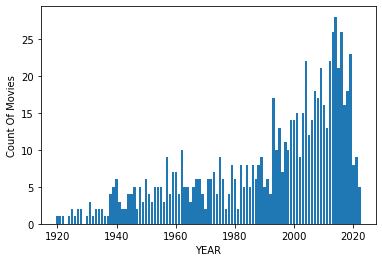

In [23]:
y = pd.DataFrame(da['year'].value_counts())
plt.bar(y.index,y.year)
plt.xlabel('YEAR')
plt.ylabel('Count Of Movies')

The sudden jump in number of movies in the late 50s and early 80s is because of the new hollywood movement

### Lets see the most popular movie grouped by th decade:

In [24]:
H = np.array(pd.DataFrame(da.loc[:,('Decade','rating')].groupby('Decade').max())['rating'])
filt = da['rating'].isin(H[0:9])
da[filt].loc[:,('title','Decade','rating')].sort_values(by = 'Decade').head(10).set_index(np.arange(1,11,1))

,title,Decade,rating
1,The Kid,"(1920, 1930]",8.3
2,Metropolis,"(1920, 1930]",8.3
3,City Lights,"(1930, 1940]",8.5
4,Modern Times,"(1930, 1940]",8.5
5,M - Eine Stadt sucht einen Mörder,"(1930, 1940]",8.3
6,Ladri di biciclette,"(1940, 1950]",8.3
7,Casablanca,"(1940, 1950]",8.5
8,Double Indemnity,"(1940, 1950]",8.3
9,Citizen Kane,"(1940, 1950]",8.3
10,It's a Wonderful Life,"(1940, 1950]",8.6


### Lets see the most succesfull movie grouped by decade:

In [25]:
H1 = np.array(pd.DataFrame(da.loc[:,('Decade','gross(in million dollars)')].groupby('Decade').max())['gross(in million dollars)'])
filt1 = da['gross(in million dollars)'].isin(H1[0:9]) 
da[filt1].loc[:,('title','Decade','gross(in million dollars)')].sort_values(by = 'Decade').head(10).set_index(np.arange(1,11,1))


,title,Decade,gross(in million dollars)
1,The Kid,"(1920, 1930]",5.45
2,The Gold Rush,"(1920, 1930]",5.45
3,Gone with the Wind,"(1930, 1940]",198.68
4,The Best Years of Our Lives,"(1940, 1950]",23.65
5,The Ten Commandments,"(1950, 1960]",93.74
6,The Sound of Music,"(1960, 1970]",163.21
7,Star Wars,"(1970, 1980]",322.74
8,E.T. the Extra-Terrestrial,"(1980, 1990]",435.11
9,Titanic,"(1990, 2000]",659.33
10,Avatar,"(2000, 2010]",760.51


Its intresting to see that in almost every decade the most rated and grossed movies are diffrent

### Lets look the stars , i will analyze some of them ::

In [26]:
filt_al = []
for i in da['stars'] : 
    filt_al.append(' Al Pacino ' in i)
r = round(da[filt_al].rating.mean(),2)
ap =  da[filt_al].title.value_counts().sum()
g = round(da[filt_al]['gross(in million dollars)'].mean(),2)
print('     Al pacinpo     ')
print('--------------------------')
print(f'Total money movies done : {ap}')
print(f'Average Rating : {r}')    
print(f'Total Money movies have made ${g}M')


     Al pacinpo     
--------------------------
Total money movies done : 9
Average Rating : 8.26
Total Money movies have made $54.68M


In [27]:
filt_bob = []
for i in da['stars'] : 
    filt_bob.append(' Robert De Niro ' in i)
r = round(da[filt_bob].rating.mean(),2)
ap =  da[filt_bob].title.value_counts().sum()
g = round(da[filt_bob]['gross(in million dollars)'].mean(),2)
print('     Robert De Niro     ')
print('--------------------------')
print(f'Total money movies done : {ap}')
print(f'Average Rating : {r}')
print(f'Total Money movies have made ${g}M')

     Robert De Niro     
--------------------------
Total money movies done : 16
Average Rating : 8.13
Total Money movies have made $59.54M


### Making a function so that eve

In [28]:
def AnalyzStar(X):
    filt_ = []
    for i in da['stars'] : 
        filt_.append(f' {X} ' in i)
    r = round(da[filt_].rating.mean(),2)
    ap =  da[filt_].title.value_counts().sum()
    g = round(da[filt_]['gross(in million dollars)'].mean(),2)
    print(f'     {X}     ')
    print('--------------------------')
    print(f'Total money movies done : {ap}')
    print(f'Average Rating : {r}')    
    print(f'Total Money movies have made ${g}M')

In [29]:
S = []
for x in da['stars']:
    for y in x:
        S.append(y)
uni_ = set(S)
list(uni_)

[' Tôru Emori ',
 ' Florijan Ajdini ',
 ' Paul Raci ',
 ' Isabelle Huppert ',
 ' Farhan Akhtar ',
 ' Michelle Yeoh ',
 ' Chris Owen ',
 ' Jim Carrey ',
 ' Rachel McAdams ',
 ' Vinícius de Oliveira ',
 ' John Ridgely ',
 ' Kajol ',
 ' Ulrich Thomsen ',
 ' Chow Yun-Fat ',
 ' Margaret Wycherly ',
 ' Jeffrey Hunter ',
 ' Mark Rylance ',
 ' Justin Timberlake ',
 ' N.T. Rama Rao Jr. ',
 ' Karl Malden ',
 ' Thomas Bo Larsen ',
 ' Alan Arkin ',
 ' Suzanne Clément ',
 ' John Wray ',
 ' Özgür Eren Koç ',
 ' Megumi Hayashibara ',
 ' Mindy Kaling ',
 ' Jonny Lee Miller ',
 ' Jin-mo Joo ',
 ' Riz Ahmed ',
 ' Aaron Eckhart ',
 ' Robert Duvall ',
 ' Marion Mack ',
 ' Taapsee Pannu ',
 ' J.D. Cannon ',
 ' Jennifer Connelly ',
 ' Max Schreck ',
 ' Lauren Ridloff ',
 ' Demet Akbag ',
 ' Giorgio Cantarini ',
 ' Julian Sands ',
 ' John Dall ',
 " Maureen O'Sullivan ",
 ' Gregory Peck ',
 ' Sakura Andô ',
 ' Ali Mosaffa ',
 ' Daniel Day-Lewis ',
 ' Jerome Flynn ',
 ' Birol Ünel ',
 ' Rufus ',
 ' Saïd Taghm

In [30]:
AnalyzStar('Jon Lovitz')

     Jon Lovitz     
--------------------------
Total money movies done : 0
Average Rating : nan
Total Money movies have made $nanM


In [31]:
AnalyzStar('Robert De Niro')

     Robert De Niro     
--------------------------
Total money movies done : 16
Average Rating : 8.13
Total Money movies have made $59.54M


In [32]:
AnalyzStar('Shah Rukh Khan')

     Shah Rukh Khan     
--------------------------
Total money movies done : 6
Average Rating : 7.97
Total Money movies have made $2.21M


## Thanks for reading, if any suggestion or query please feel free to contact me